Importing the dependencies

In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.4/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 3.4/150.0 MB 5.3 MB/s eta 0:00:28
   - -------------------------------------- 5.0/150.0 MB 5.8 MB/s eta 0:00:25
   - -------------------------------------- 6.3/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 7.6/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 9.2/150.0 MB 6.1 MB/s eta 0:00:23
   -- ------------------------------------- 10.5/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 11.8/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 12.8/150.0 MB 6.1 MB/s eta 0:00:23
   --- ------------------------------------ 14.4/150.0 MB 6.2 MB/s eta 0:00:22
   ---- ----------------------------------- 16.0/150.0 MB 6.2 MB/s 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the California House Price Dataset

In [11]:
california = fetch_california_housing(as_frame=True)
df = california.frame
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
#checking the no of rows and column in df
df.shape

(20640, 9)

In [15]:
# checking for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [16]:
# statistical measure of df
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

1.Positive correlation 

2.Negative correlation

In [18]:
correlation = df.corr()

<Axes: >

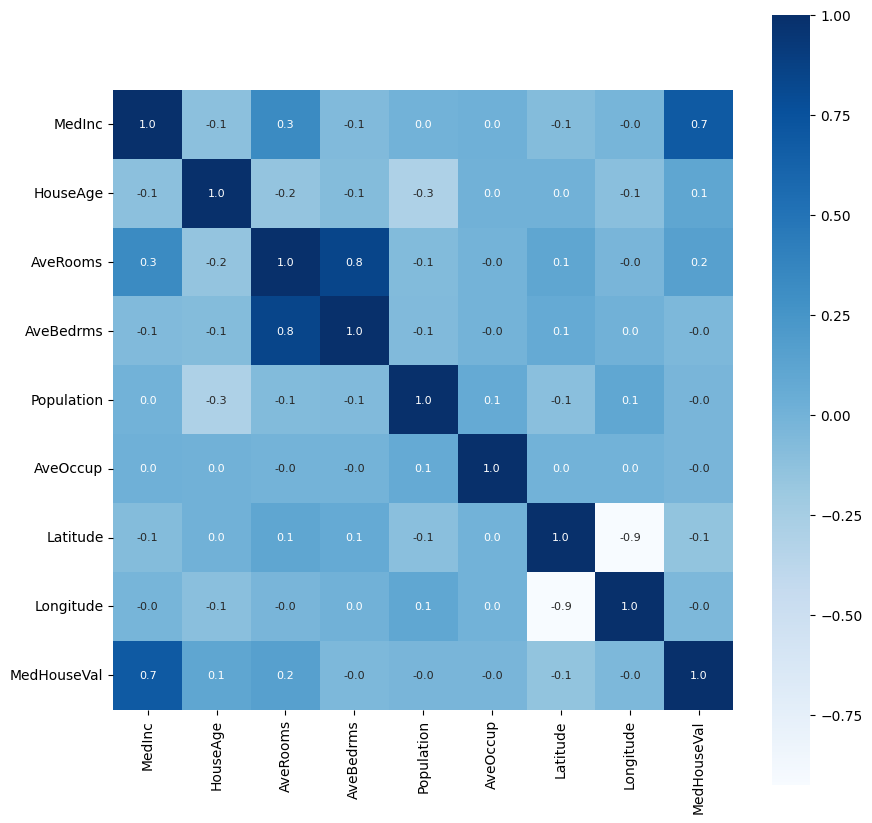

In [19]:
# constructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

In [20]:
# Splitting Features and Target
X = df.drop('MedHouseVal', axis=1)
Y = df['MedHouseVal']

In [21]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [22]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [23]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [25]:
# loading the model
model = XGBRegressor()

In [26]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation of Model

Prediction on training data

In [29]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)  # model will predict taking all X_train features and predict the price and store in the training_data_prediction

In [30]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [31]:
# R squarred error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Squarred Error : ', score_1) 
print('Mean Absolute Error : ', score_2) 

R Squarred Error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


Visualizing the actual Prices and Predicted prices

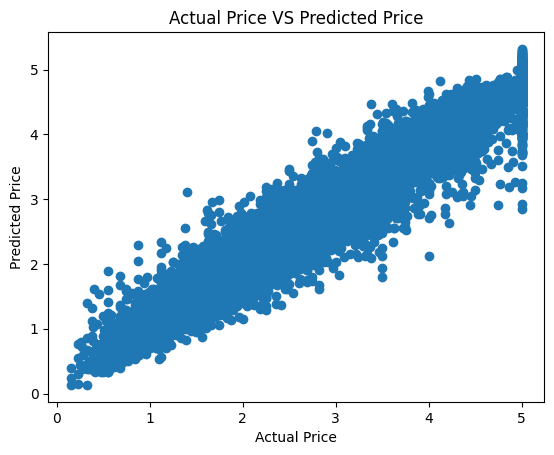

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

Prediction of Test Data

In [32]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test) 

In [33]:
# R squarred error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Squarred Error : ', score_1) 
print('Mean Absolute Error : ', score_2) 

R Squarred Error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186
